In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [4]:
from os import listdir

In [7]:
fileslist = listdir('pre/')

In [12]:
fileslist

['14_Aaron_Johnson_0001.jpg',
 '14_Adelaide_Kane_0015.jpg',
 '24_Nicholas_Hoult_0013.jpg',
 '24_Nina_Dobrev_0006.jpg',
 '26_Dania_Ramirez_0009.jpg',
 '26_Darren_Criss_0002.jpg',
 '27_Gal_Gadot_0011.jpg',
 '32_Rachael_Leigh_Cook_0003.jpg',
 '49_Jim_Carrey_0009.jpg',
 '53_James_Spader_0005.jpg']

In [13]:
imgpath = ['pre/' + i for i in fileslist]

In [14]:
imgpath

['pre/14_Aaron_Johnson_0001.jpg',
 'pre/14_Adelaide_Kane_0015.jpg',
 'pre/24_Nicholas_Hoult_0013.jpg',
 'pre/24_Nina_Dobrev_0006.jpg',
 'pre/26_Dania_Ramirez_0009.jpg',
 'pre/26_Darren_Criss_0002.jpg',
 'pre/27_Gal_Gadot_0011.jpg',
 'pre/32_Rachael_Leigh_Cook_0003.jpg',
 'pre/49_Jim_Carrey_0009.jpg',
 'pre/53_James_Spader_0005.jpg']

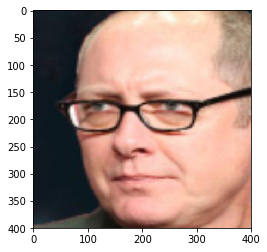

In [93]:
image = plt.imread(imgpath[9])
image.shape
plt.imshow(image)

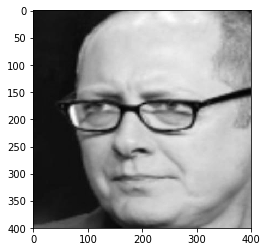

In [94]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

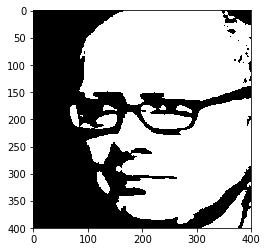

In [95]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

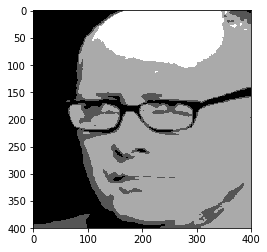

In [96]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [97]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [98]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

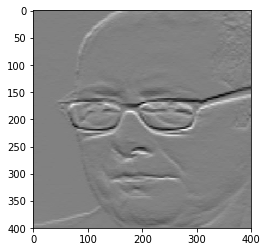

In [99]:
plt.imshow(out_h, cmap='gray')